In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [44]:
#cargamos nodos
nodos=pd.read_csv('quakers_nodelist.csv')
#cargamos aristas
aristas=pd.read_csv('quakers_edgelist.csv')
nodos = nodos[['Name','Historical Significance','Birthdate','Deathdate','ID','Gender']]
nodos.head(10)

,Name,Historical Significance,Birthdate,Deathdate,ID,Gender
0,Joseph Wyeth,religious writer,1663,1731,10013191,male
1,Alexander Skene of Newtyle,local politician and author,1621,1694,10011149,male
2,James Logan,colonial official and scholar,1674,1751,10007567,male
3,Dorcas Erbery,Quaker preacher,1656,1659,10003983,female
4,Lilias Skene,Quaker preacher and poet,1626,1697,10011152,male
5,William Mucklow,religious writer,1630,1713,10008595,male
6,Thomas Salthouse,Quaker preacher and writer,1630,1691,10010643,male
7,William Dewsbury,Quaker activist,1621,1688,10003478,male
8,John Audland,Quaker preacher,1630,1664,10000411,male
9,Richard Claridge,Quaker minister and schoolmaster,1649,1723,10002469,male


In [45]:
aristas.head(10)

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
5,George Keith,George Fox
6,George Keith,George Whitehead
7,George Keith,William Bradford
8,James Parnel,Benjamin Furly
9,James Parnel,Stephen Crisp


In [3]:
#construimos el grafo
graph = nx.Graph()
#añadimos los nodos
for name,historicalSignificance,gender,birthdate,deathdate,Id in zip(nodos['Name'],nodos['Historical Significance'],nodos['Gender'],nodos['Birthdate'],nodos['Deathdate'],nodos['ID']):
    graph.add_node(name, Name=name,Historical_Significance=historicalSignificance,Gender=gender,Birthdate=birthdate,Deathdate=deathdate,Id=Id)
#añadimos las aristas
for source,target in zip(aristas['Source'],aristas['Target']):
    graph.add_edge(source,target)
#print(list(graph.nodes))
#print(list(graph.edges))
#graph.nodes[118]
graph.edges.data()
#graph.number_of_nodes()

EdgeDataView([('Joseph Wyeth', 'Thomas Ellwood', {}), ('Alexander Skene of Newtyle', 'Lilias Skene', {}), ('James Logan', 'Peter Collinson', {}), ('James Logan', 'John Bartram', {}), ('James Logan', 'William Penn', {}), ('James Logan', 'David Lloyd', {}), ('Dorcas Erbery', 'James Nayler', {}), ('William Mucklow', 'George Fox', {}), ('Thomas Salthouse', 'George Fox', {}), ('Thomas Salthouse', 'Margaret Fell', {}), ('William Dewsbury', 'Edward Burrough', {}), ('William Dewsbury', 'George Fox', {}), ('William Dewsbury', 'John Crook', {}), ('John Audland', 'John Camm', {}), ('John Audland', 'Francis Howgill', {}), ('John Audland', 'Edward Pyott', {}), ('John Audland', 'Charles Marshall', {}), ('John Audland', 'George Fox', {}), ('John Audland', 'Anne Camm', {}), ('Richard Claridge', 'Joseph Besse', {}), ('Richard Claridge', 'William Penn', {}), ('William Bradford', 'George Keith', {}), ('William Bradford', 'William Penn', {}), ('William Bradford', 'Tace Sowle', {}), ('Fettiplace Bellers', 

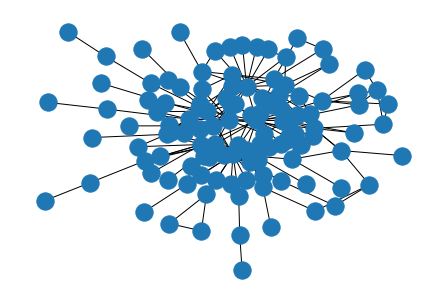

In [4]:
#dibujamos el grafo
nx.draw_kamada_kawai(graph)
plt.show()

In [5]:
#A esto hay que darle una vuelta
from sklearn import preprocessing

In [51]:
atributos = nodos.loc[:,'Name':'Gender']
objetivo = aristas.loc[:,'Source':'Target']

In [52]:
codificador_atributos = preprocessing.OneHotEncoder()
codificador_atributos.fit(atributos)

OneHotEncoder()

In [53]:
atributos_codificados = codificador_atributos.transform(atributos)

In [55]:
codificador_objetivo = preprocessing.OrdinalEncoder()
objetivo_codificado = codificador_objetivo.fit_transform(objetivo)

In [58]:
from sklearn import model_selection

In [60]:
(atributos_entrenamiento, atributos_prueba, objetivo_entrenamiento, objetivo_prueba) = model_selection.train_test_split(
        atributos_codificados, objetivo_codificado,
        random_state=12345,
        test_size=.33,
        stratify=objetivo_codificado)

ValueError: Found input variables with inconsistent numbers of samples: [119, 174]

In [40]:
#Centralidad de personas más relacionadas
pd.DataFrame.from_dict(nx.algorithms.centrality.degree_centrality(graph), 
                       orient='index',
                       columns = ['grado_centralidad'])\
            .sort_values(['grado_centralidad'], 
                         ascending = False)\
            .head(10)

,grado_centralidad
George Fox,0.186441
William Penn,0.152542
James Nayler,0.135593
George Whitehead,0.110169
Margaret Fell,0.110169
Benjamin Furly,0.084746
Edward Burrough,0.076271
Thomas Ellwood,0.067797
George Keith,0.067797
Francis Howgill,0.059322


In [41]:
#Centralidad de personas más cercanas
pd.DataFrame.from_dict(nx.closeness_centrality(graph), 
                       orient='index', 
                       columns = ['centralidad_proximidad']) \
            .sort_values(['centralidad_proximidad'], ascending = False) \
            .head(10)

,centralidad_proximidad
George Fox,0.392221
William Penn,0.373088
George Whitehead,0.354088
Margaret Fell,0.338421
James Nayler,0.331095
George Keith,0.325460
Benjamin Furly,0.321357
Thomas Ellwood,0.302305
Edward Burrough,0.297599
Rebecca Travers,0.297599


In [42]:
#Centralidad de puentes
pd.DataFrame.from_dict(nx.algorithms.centrality.betweenness_centrality(graph), 
                       orient='index', 
                       columns = ['centralidad_intermedio'])\
            .sort_values(['centralidad_intermedio'], 
                         ascending = False)\
            .head(10)

,centralidad_intermedio
William Penn,0.239995
George Fox,0.236833
George Whitehead,0.126320
Margaret Fell,0.121068
James Nayler,0.104460
Benjamin Furly,0.064196
Thomas Ellwood,0.046191
George Keith,0.045007
John Audland,0.041649
Alexander Parker,0.038937
